In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np


city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")


# Combine the data into a single dataset
combined_data = ride_data.merge(city_data, how = "inner", on = "city")

combined_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

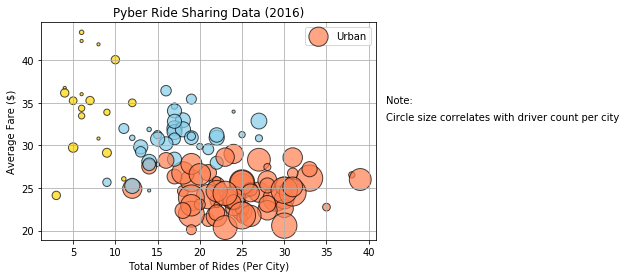

In [10]:
# Obtain the x and y coordinates for each of the three city types
#average fare per city, total drivers per city, total rides, city type
total_drivers = combined_data.groupby("city").mean().iloc[:,2].to_frame()

avg_fare = combined_data.groupby("city").mean().iloc[:,0].to_frame()

total_rides = combined_data.groupby("city").nunique().iloc[:,3].to_frame()

city_type = combined_data.iloc[:,[0,5]].drop_duplicates(keep = "first").sort_values("city")

a = total_drivers.merge(avg_fare, on = "city")
b = total_rides.merge(city_type, on = "city")

col = []
for types in city_type["type"]:
    if  types == "Urban":
        col.append("coral")
    elif types == "Suburban":
        col.append("skyblue")
    elif types == "Rural":
        col.append("gold")
        
all_data = a.merge(b, on = "city")

all_data["Colors"] = col


plt.scatter(all_data["ride_id"], all_data["fare"], s = all_data["driver_count"] * 10, 
            facecolors = col, edgecolors = "black", alpha = .7, marker = "o", label = types)


# Incorporate the other graph properties

plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# Create a legend
plt.legend()

# Incorporate a text label regarding circle size

plt.text(all_data["ride_id"].max() + 3, 35, "Note: ")
plt.text(all_data["ride_id"].max() + 3, 33, "Circle size correlates with driver count per city")


# Save Figure
plt.savefig("Images/ride_sharing_2016.png")


In [11]:
# Show plot
plt.show()

## Total Fares by City Type

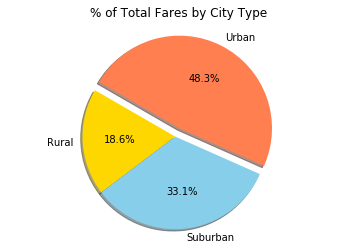

In [77]:
# Calculate Type Percents
total_fares_pie = all_data.groupby("type").sum()["fare"].tolist()
colors = ["gold", "skyblue", "coral"]
city_type_pie = ["Rural", "Suburban", "Urban"]
explode = [0,0, .1]


# Build Pie Chart
plt.pie(total_fares_pie, explode = explode, labels = city_type_pie,
       colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150);

plt.title("% of Total Fares by City Type")
plt.axis("equal");


# Save Figure
plt.savefig("Images/fares_by_city.png")

In [70]:
# Show Figure
plt.show()

## Total Rides by City Type

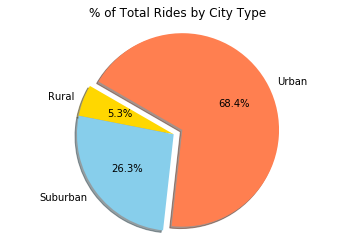

In [66]:
# Calculate Ride Percents

total_rides_pie = all_data.groupby("type").sum()["ride_id"].tolist()
colors = ["gold", "skyblue", "coral"]
city_type_pie = ["Rural", "Suburban", "Urban"]
explode = [0, 0, .1]

# Build Pie Chart
plt.pie(total_rides_pie, explode = explode, labels = city_type_pie,
       colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150);

plt.title("% of Total Rides by City Type")
plt.axis("equal");


# Save Figure
plt.savefig("Images/rides_by_city.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

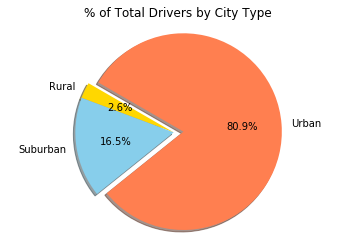

In [69]:
# Calculate Driver Percents
total_drivers_pie = all_data.groupby("type").sum()["driver_count"].tolist()
colors = ["gold", "skyblue", "coral"]
city_type_pie = ["Rural", "Suburban", "Urban"]
explode = [0, 0, .1]


# Build Pie Charts
plt.pie(total_drivers_pie, explode = explode, labels = city_type_pie,
       colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150);

plt.title("% of Total Drivers by City Type")
plt.axis("equal");


# Save Figure
plt.savefig("Images/drivers_by_city.png")


In [ ]:
# Show Figure
plt.show()